In [3]:
# Import modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# Read data
raw_data = pd.read_csv('dataset/data.csv')
print(raw_data.shape)
# data.head()

(11914, 16)


In [5]:
data = raw_data[~(np.isnan(raw_data['Engine HP']))]
data = data[~(np.isnan(data['MSRP']))]
print(data.shape)

(11845, 16)


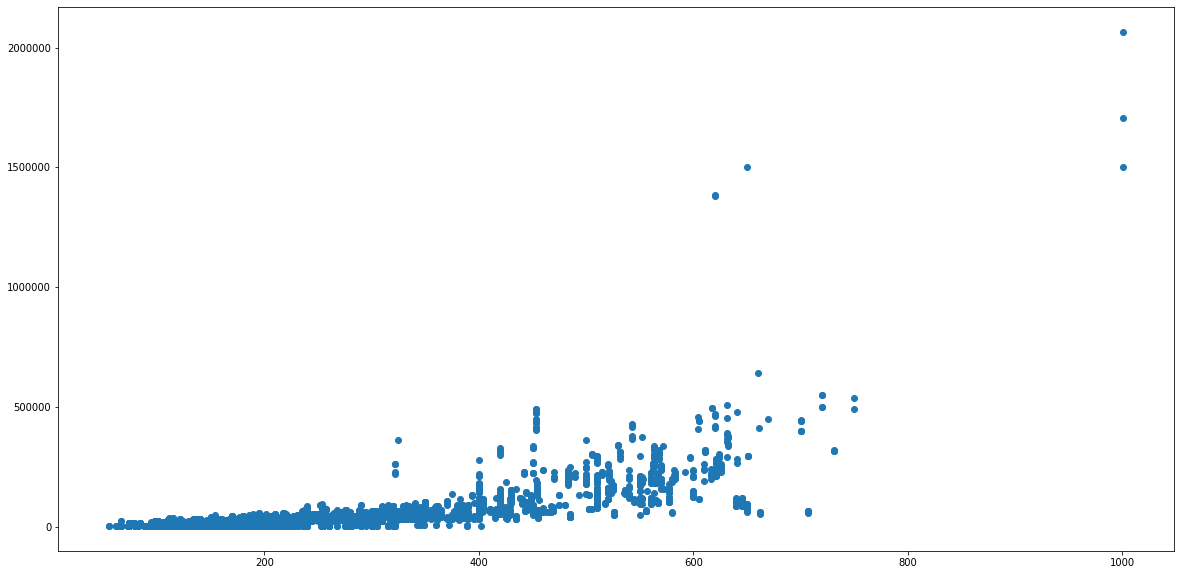

In [6]:
# Collect X and Y
X = data['Engine HP'].values
Y = data['MSRP'].values
plt.scatter(X, Y)

In [7]:
# Mean X and Y
meanX = X.mean()
meanY = Y.mean()

# Total number of values
n = data.shape[0] # nrows

# Using the formula to calculate b1 and b0
# y = b0 + b1*x
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - meanX) * (Y[i] - meanY)
    denom += (X[i] - meanX) ** 2
b1 = numer/denom
b0 = meanY - (b1 * meanX)

print(b1, b0)

365.2883561891869 -50550.631983032676


In [8]:
# Plotting values and Regression line
maxX = max(X) + 100
minX = min(X) - 100

# Calculating line values x and y
x = np.linspace(minX, maxX, 1000)
y = b0 + b1*x

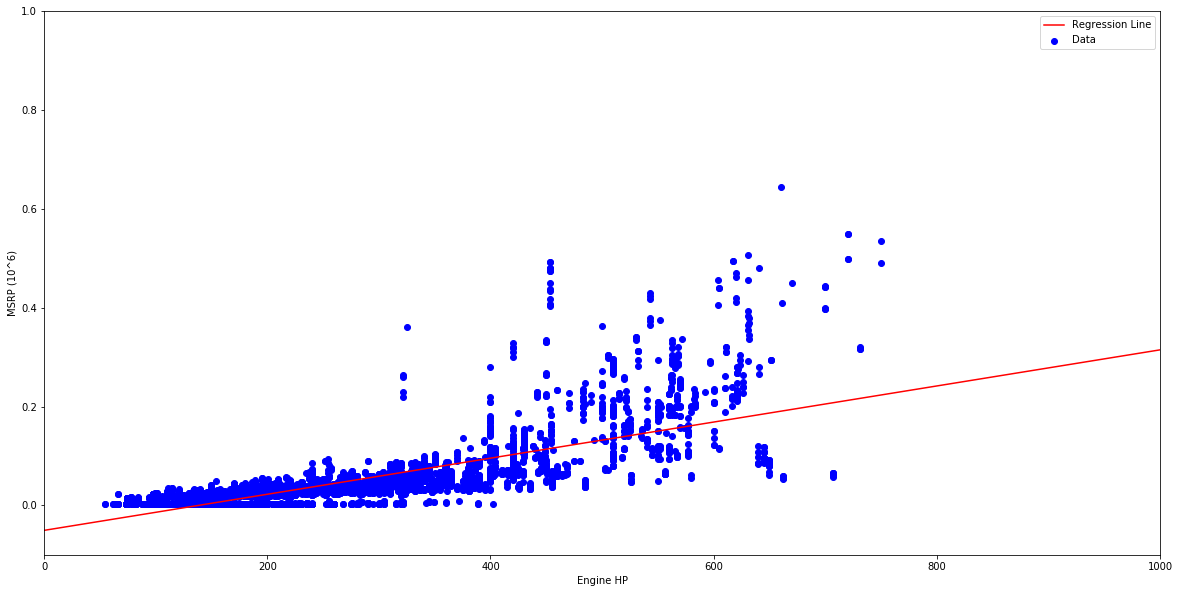

In [9]:
# Plot line
plt.plot(x, y/10**6, color='red', label='Regression Line')
# Plot scatter points
plt.scatter(X, Y/10**6, color='blue', label='Data')

plt.xlabel('Engine HP')
plt.xlim(0,1000)
plt.ylim(-0.1,1)
plt.ylabel('MSRP (10^6)')
plt.legend()
plt.show()

In [10]:
# Calculate R-squared
ss_t = 0
ss_r = 0
for i in range(n):
    predY = b0 + b1 * X[i]
    ss_t += (Y[i] - meanY) ** 2
    ss_r += (Y[i] - predY) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.43825414270767626


In [24]:
# Scikit learn - machine learning linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use rank one matrix in scikit learn
xx = X.reshape((n,1))
# Creating model
lm = LinearRegression()
# Fitting training data
lm = lm.fit(xx, Y)
# Y prediction
predYY = lm.predict(xx)
predYY

# Calculating RMSE and R2 score
mse = mean_squared_error(Y, predYY)
rmse = np.sqrt(mse)
r2_score = lm.score(xx, Y)

print(rmse)
print(r2_score)

45155.9230918633
0.4382541427076648
